### 워드클라우드 - 어버이날 선물

In [27]:
import re, nltk
from konlpy.tag import Okt
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

- 한글 텍스트 전처리

In [3]:
with open('data/어버이날 선물.txt') as f:
    text = f.read()

In [6]:
okt = Okt()
tokens = okt.nouns(text)        # 문장에서 명사 추출
tokens[:10]

['어버이날', '선물', '추천', '탄생석', '골드', '카네이션', '추천', '카네이션', '자체', '전체']

In [12]:
# 영문자, 숫자 제거
new_tokens = []
for token in tokens:
    item = re.sub('[A-Za-z0-9]', '', token)
    if item:            # 빈 문자열이면 False조건이므로 즉, 빈 문자열이 아닌 것만 append
        new_tokens.append(item)

- 불용어 정리
    - 아래 두 문장을 만족할 때 까지 반복

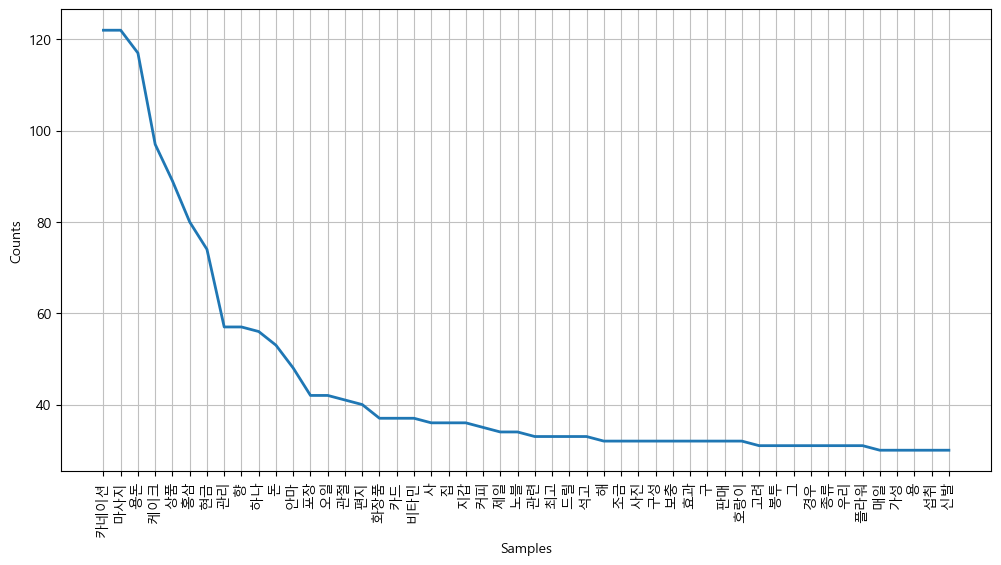

In [20]:
gift = nltk.Text(new_tokens, name='어버이날선물')
plt.figure(figsize=(12, 6))
gift.plot(50);

In [19]:
stoptext = """"
    선물 추천 어버이날 부모님 것 수 건강 제품 제 이 저 식품 가격 도움 요 스 위 참고 사용 활동 때 파트너 고민 수수료 위 구매 등 세트 생각 제공 요즘 기 분 상 품 박스 꽃 정액 한번
    마음 이미지 존재 링크 일환 아래 정말 더 선택 기능 거 지금 쿠팡 포스팅 양제 답변 부담 방향 준비 주문 인기 브랜드 날 디자인 정보 건 의미 채택 이번 배송 질문 아버지 일 시간
    나이 어머니 꼭 엄마 정도 걸 운동 때문 제작 가장 가지 발 저희 콘드 이친 도 중 할인 통해 평소 후기 보시 자 직접 때문 좀 피 번 전 글 졔일 다른
"""
stop_words = stoptext.split()
new_tokens = [word for word in new_tokens if word not in stop_words]
new_tokens[:10]

['탄생석', '골드', '카네이션', '카네이션', '자체', '전체', '도금', '완전', '금', '카네이션']

- 워드 클라우드 그리기

In [21]:
data = gift.vocab().most_common(5)
data

[('카네이션', 122), ('마사지', 122), ('용돈', 117), ('케이크', 97), ('상품', 89)]

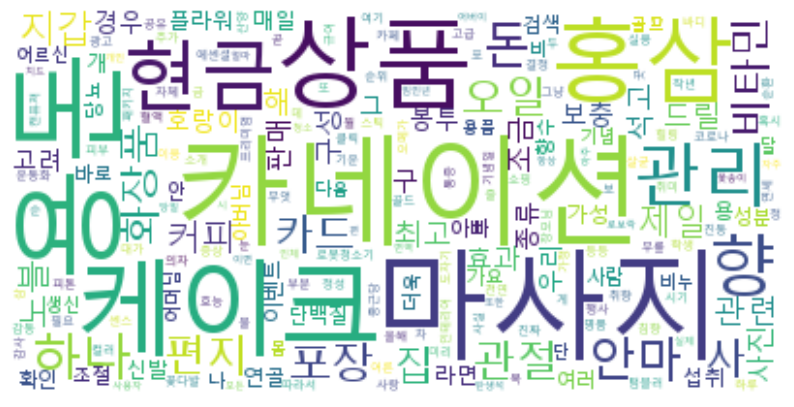

In [23]:
wc = WordCloud(
        background_color='white', random_state=2023,
        font_path=('c:/Windows/Fonts/malgun.ttf')
    ).generate_from_frequencies(dict(gift.vocab().most_common(300)))
plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

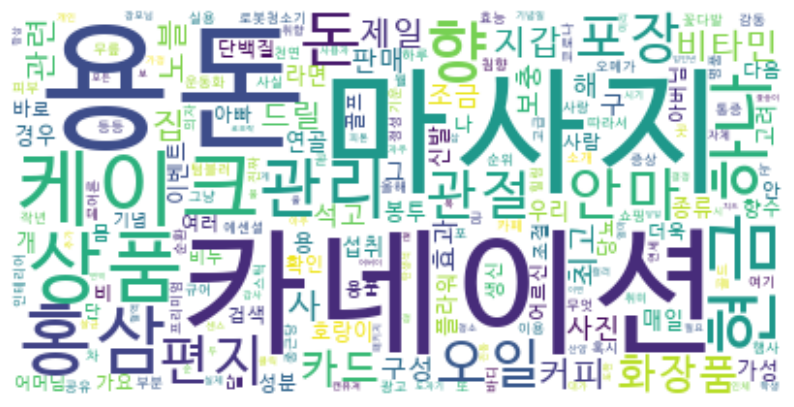

In [26]:
wc = WordCloud(
        background_color='white', random_state=2023,
        font_path=('C:/Users/YONSAI/AppData/Local/Microsoft/Windows/Fonts/D2Coding-Ver1.3.2-20180524-all.ttc')
    ).generate_from_frequencies(dict(gift.vocab().most_common(300)))
plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

- 그림 위에 표시

In [30]:
mask = np.array(Image.open('./data/heart.jpg'))

from wordcloud import ImageColorGenerator
image_colors = ImageColorGenerator(mask)

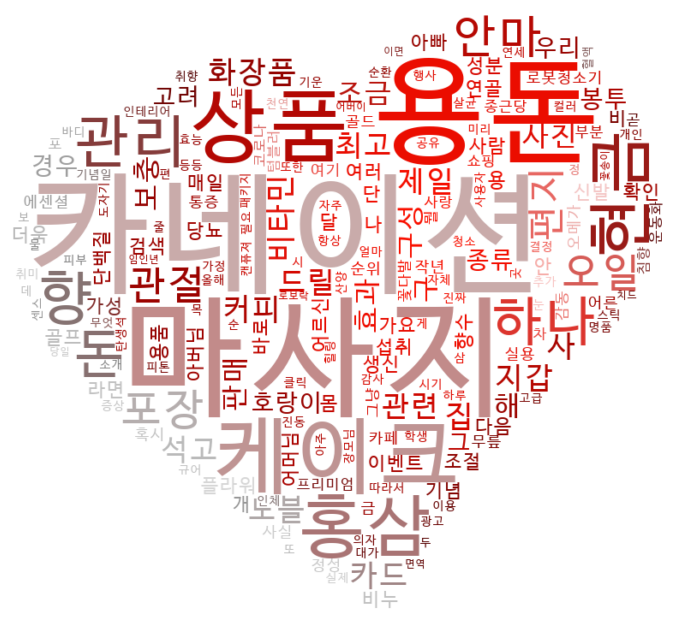

In [37]:
wc = WordCloud(
        background_color='white', random_state=2023,
        font_path=('C:/Users/YONSAI/AppData/Local/Microsoft/Windows/Fonts/D2Coding-Ver1.3.2-20180524-all.ttc')
        , mask = mask
    ).generate_from_frequencies(dict(gift.vocab().most_common(300)))
plt.figure(figsize=(12,8))
plt.imshow(wc.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off');